# **Case Study – Location-Based Intelligence**

>### **Objectives**

1.   The key factor that will be important is that the location should either be currently undervalued/ display strong potential to appreciate in the next few years 
2.   Find out locations that are suitable for Real Estate Investment
3.   Visualizing the insights and creating pdf report
     
> **Optional**

*   Build ML models to predict location-based prices
*   Choose alternate data sources like satellite imagery,etc. 





### **Downloading the data**

The data was downloaded from https://www.redfin.com/ which is a full-service real estate brokerage. They cover majority of US states and counties. The data was downloaded for Portland County for active properties to be sold plus the sold property over last 3 years. The selction is done manually on the website and the website returns 350 homes per request. But by making changes in the api call I was able to get around 10000 homes per request.

web url - https://www.redfin.com/city/30772/OR/Portland/filter/include=forsale+mlsfsbo+construction+fsbo+sold-3yr

api url - https://www.redfin.com/stingray/api/gis-csv?al=1&market=oregon&min_stories=1&num_homes=350&ord=redfin-recommended-asc&page_number=1&poly=-122.66039 45.52699,-122.50882 45.52699,-122.50882 45.58565,-122.66039 45.58565,-122.66039 45.52699®ion_id=30772®ion_type=6&sf=1,2,3,5,6,7&sold_within_days=1825&status=9&uipt=1,2,3,4,5,6,7,8&v=8

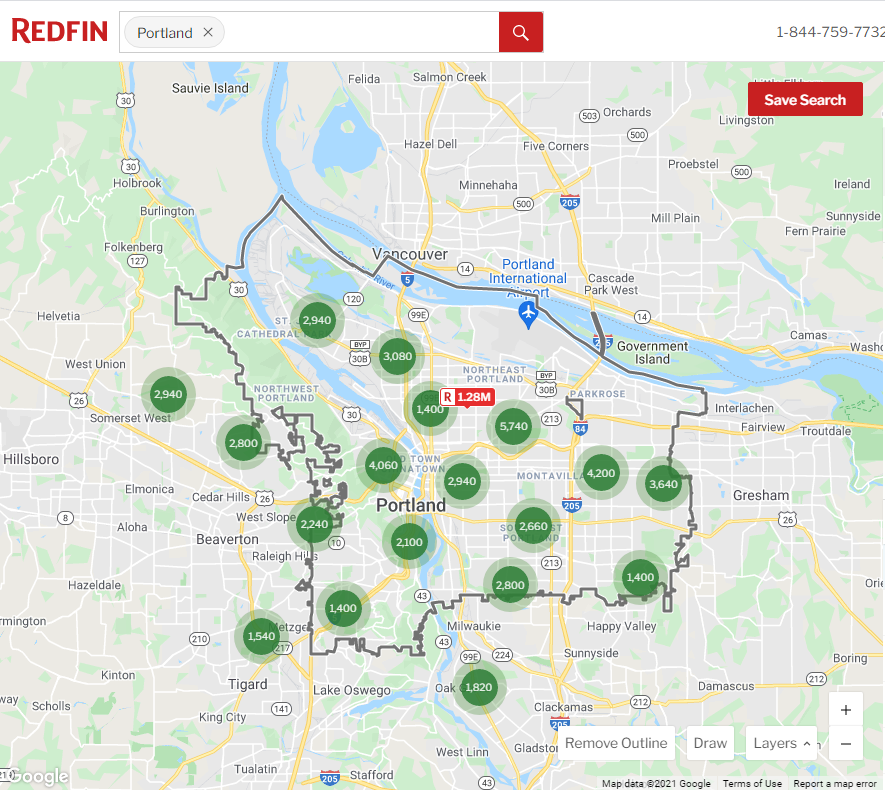

### **Cleaning the dataset and visualizing the columns**

##### **Install and Import Libraries**

In [3]:
import pandas as pd

##### **Read data**

In [4]:
df = pd.read_csv('content/redfin_2021-09-04-10-40-37.csv')
df.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,2875 NE Hamblet St,Portland,OR,97212.0,1275000.0,4.0,3.0,Portland Northeast,2701.0,3920.0,2019.0,1.0,472.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/2875-NE-Hamb...,RMLS,21690092,N,Y,45.550606,-122.636329
1,MLS Listing,NaN,Single Family Residential,5808 SW Sheridan Ct,Portland,OR,97221.0,699900.0,4.0,2.0,BRIDLEMILE/SOUTHWEST HILLS,1924.0,19602.0,1964.0,2.0,364.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/5808-SW-Sher...,RMLS,21629100,N,Y,45.504298,-122.736880
2,MLS Listing,NaN,Multi-Family (2-4 Unit),11897 SE Pine St,Portland,OR,97216.0,449900.0,3.0,3.0,Portland Southeast,NaN,NaN,2005.0,2.0,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/OR/Portland/11897-SE-Pin...,RMLS,21330955,N,Y,45.520713,-122.540630
3,MLS Listing,NaN,Townhouse,6813 NW 163rd Ave,Portland,OR,97229.0,535000.0,4.0,2.5,Arbor Lakes,1922.0,2613.0,2014.0,2.0,278.0,212.0,Active,September-5-2021 10:00 AM,September-5-2021 12:00 PM,http://www.redfin.com/OR/Portland/6813-NW-163r...,RMLS,21056418,N,Y,45.568689,-122.845517
4,MLS Listing,NaN,Single Family Residential,11124 SW 64th Ave,Portland,OR,97219.0,515000.0,3.0,2.5,"Portland West, Raleigh Hills",1364.0,5227.0,1987.0,3.0,378.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/11124-SW-64t...,RMLS,21401557,N,Y,45.444668,-122.742339


##### **Rename columns**
Looking at the columns you can see there are columns with special characters in their names. lets first remove those

In [5]:
df = df.rename(columns={'$/SQUARE FEET': 'DOLLAR PER SQFT', 'HOA/MONTH': 'HOA PER MONTH', 'MLS#':'MSL','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)':'URL'})
df.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,DOLLAR PER SQFT,HOA PER MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL,SOURCE,MSL,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,2875 NE Hamblet St,Portland,OR,97212.0,1275000.0,4.0,3.0,Portland Northeast,2701.0,3920.0,2019.0,1.0,472.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/2875-NE-Hamb...,RMLS,21690092,N,Y,45.550606,-122.636329
1,MLS Listing,NaN,Single Family Residential,5808 SW Sheridan Ct,Portland,OR,97221.0,699900.0,4.0,2.0,BRIDLEMILE/SOUTHWEST HILLS,1924.0,19602.0,1964.0,2.0,364.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/5808-SW-Sher...,RMLS,21629100,N,Y,45.504298,-122.736880
2,MLS Listing,NaN,Multi-Family (2-4 Unit),11897 SE Pine St,Portland,OR,97216.0,449900.0,3.0,3.0,Portland Southeast,NaN,NaN,2005.0,2.0,NaN,NaN,Active,NaN,NaN,http://www.redfin.com/OR/Portland/11897-SE-Pin...,RMLS,21330955,N,Y,45.520713,-122.540630
3,MLS Listing,NaN,Townhouse,6813 NW 163rd Ave,Portland,OR,97229.0,535000.0,4.0,2.5,Arbor Lakes,1922.0,2613.0,2014.0,2.0,278.0,212.0,Active,September-5-2021 10:00 AM,September-5-2021 12:00 PM,http://www.redfin.com/OR/Portland/6813-NW-163r...,RMLS,21056418,N,Y,45.568689,-122.845517
4,MLS Listing,NaN,Single Family Residential,11124 SW 64th Ave,Portland,OR,97219.0,515000.0,3.0,2.5,"Portland West, Raleigh Hills",1364.0,5227.0,1987.0,3.0,378.0,NaN,Active,September-4-2021 11:00 AM,September-4-2021 01:00 PM,http://www.redfin.com/OR/Portland/11124-SW-64t...,RMLS,21401557,N,Y,45.444668,-122.742339


##### **Drop unnecessary or empty rows and columns**

It is alwasy good to have large attributes of data for any analysis. But if we have NaN(empty) values it affects the quality of analysis and its inferences and we would drop rows having NaN values for important columns. Also if the data is redundant or if we are not going to use the columns for our analysis there is no need to keep those columns. Hence we would remove those columns by dropping them.

In [6]:
df = df.dropna(subset=['PROPERTY TYPE'	,'ADDRESS'	,'CITY',	'STATE OR PROVINCE',	'ZIP OR POSTAL CODE',	'PRICE',	'BEDS',	'BATHS',	'LOCATION',	'SQUARE FEET'	,'LOT SIZE',	'YEAR BUILT',	'DAYS ON MARKET',	'DOLLAR PER SQFT',	'HOA PER MONTH' , 'LATITUDE'	,'LONGITUDE'])

In [7]:
df.drop(columns=['SOLD DATE','NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME','FAVORITE', 'INTERESTED'],errors='ignore', inplace=True)
df.head(5)

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,DOLLAR PER SQFT,HOA PER MONTH,STATUS,URL,SOURCE,MSL,LATITUDE,LONGITUDE
3,MLS Listing,Townhouse,6813 NW 163rd Ave,Portland,OR,97229.0,535000.0,4.0,2.5,Arbor Lakes,1922.0,2613.0,2014.0,2.0,278.0,212.0,Active,http://www.redfin.com/OR/Portland/6813-NW-163r...,RMLS,21056418,45.568689,-122.845517
7,MLS Listing,Single Family Residential,8865 SE Bristol Park Dr,Happy Valley,OR,97086.0,725000.0,4.0,3.0,"Milwaukie, Gladstone, Happy Valley, Clckmas, D...",2548.0,5227.0,1998.0,8.0,285.0,31.0,Active,http://www.redfin.com/OR/Happy-Valley/8865-SE-...,RMLS,21172927,45.458188,-122.559190
65,PAST SALE,Single Family Residential,2525 NW Arnott Ln,Portland,OR,97229.0,629900.0,4.0,2.5,IRON RIDGE PARK,2324.0,4791.0,2011.0,318.0,271.0,30.0,Sold,http://www.redfin.com/OR/Portland/2525-NW-Arno...,RMLS,20264930,45.537885,-122.795329
94,PAST SALE,Single Family Residential,4561 NW Continental Pl,Beaverton,OR,97006.0,450000.0,3.0,2.5,NW Washington Co or Sauvie Island,1518.0,2613.0,2000.0,183.0,296.0,75.0,Sold,http://www.redfin.com/OR/Beaverton/4561-NW-Con...,RMLS,21067322,45.552848,-122.850795
120,PAST SALE,Single Family Residential,1123 NW 93rd Ave,Portland,OR,97229.0,490000.0,4.0,2.5,NW Washington Co or Sauvie Island,1853.0,3049.0,2011.0,1534.0,264.0,48.0,Sold,http://www.redfin.com/OR/Portland/1123-NW-93rd...,RMLS,17684940,45.527355,-122.773088


In [8]:
df.shape #number of rows and cols

(714, 22)

###### **Visualize the quantitative data**

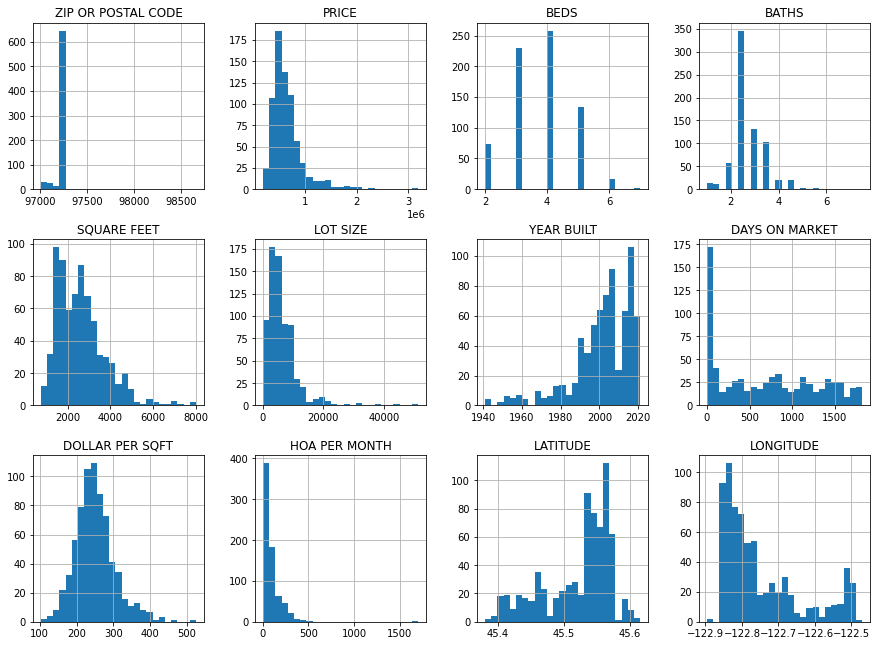

In [9]:
hist_plot = df.hist(bins=25, layout=(4,4), figsize=(15,15))

##### **Outlier Analysis**

Outlier are nothing but extreme values which lies outside normal distribution of values. Outliers can be caused to human errors while feeding the data. Having outliers in the data can cause many discrepencies. Hence we will first find details stats of data and check for outliers.

In [10]:
df.describe().round(2) # round(2) is used to round of values to two decimals

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,DOLLAR PER SQFT,HOA PER MONTH,LATITUDE,LONGITUDE
count,714.00,714.00,714.00,714.00,714.00,714.00,714.00,714.00,714.00,714.00,714.00,714.00
mean,97217.37,641064.61,3.71,2.79,2605.92,6554.75,2001.60,695.03,250.55,91.77,45.52,-122.75
std,71.73,312182.13,0.98,0.70,1124.07,5998.23,15.16,578.42,53.99,105.13,0.05,0.11
min,97005.00,175000.00,2.00,1.00,737.00,1.00,1941.00,1.00,103.00,2.00,45.38,-122.90
25%,97224.00,441340.00,3.00,2.50,1739.50,3049.00,1996.00,80.00,217.00,29.00,45.49,-122.83
50%,97229.00,569972.50,4.00,2.50,2475.00,5227.00,2004.00,652.00,244.00,57.50,45.54,-122.79
75%,97229.00,742625.00,4.00,3.00,3179.50,8276.00,2014.00,1177.75,277.00,118.00,45.56,-122.69
max,98661.00,3195000.00,7.00,7.50,8022.00,51400.00,2021.00,1824.00,525.00,1700.00,45.62,-122.47


##### **Saving to disk**
There seems no outliers hence we can start with our analysis before that we will save the dataset

In [11]:
df.to_csv('houses_cleaned.csv',index=False)